In [1]:
import json
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
from matplotlib.patches import Rectangle
import mplhep as hep

In [2]:
plt.style.use(hep.style.CMS)

In [3]:
# json_files = glob.glob("./results/*.json")

# # Dictionary where the key is the filename (without extension) and value is the JSON content
# ecf_dict = {}
# for i in os.listdir('./results/'):
#     if ('json' in i) and (i[0:9] == 'ungroomed'):
#         data = json.load(open(f'./results/{i}'))
#     ecf_dict = ecf_dict | data

In [4]:
with open('groomed_ratio_ks.json','r') as f:
    groomed = json.load(f)
with open('ungroomed_ratio_ks.json','r') as f:
    ungroomed = json.load(f)

In [5]:
temp = {}
for i in groomed:
    temp[f'grm_{i}'] = groomed[i]
groomed = temp

temp = {}
for i in ungroomed:
    temp[f'ugm_{i}'] = ungroomed[i]
ungroomed = temp

In [6]:
ratios = groomed | ungroomed

In [7]:
list(ratios.keys())[0].find('**')

15

In [8]:
ratios2 = {}
for i in ratios:
    if float(i[i.find('**')+2:]) <= 5:
        ratios2[i] = ratios[i]

In [9]:
len(ratios2)

28872

In [10]:
ratios_df = pd.DataFrame(ratios2).T

In [19]:
ratios_df

,ks_statistic,bootstrap_p,adjusted_ks
grm_1e215/1e230**0.5,0.011631,0.506,1.934401
grm_1e235/1e230**1.1666666666666667,0.005626,0.557,2.249768
grm_1e210/1e235**0.2857142857142857,0.014539,0.507,1.837475
grm_1e215/1e235**0.42857142857142855,0.009715,0.589,2.012574
grm_1e220/1e210**2.0,0.018021,0.584,1.744229
...,...,...,...
ugm_6e540/3e520**4.0,0.035508,0.535,1.449670
ugm_5e540/3e535**1.9047619047619047,0.032021,0.534,1.494571
ugm_6e540/3e540**2.0,0.024839,0.573,1.604872
ugm_4e540/2e535**2.2857142857142856,0.033916,0.523,1.469594


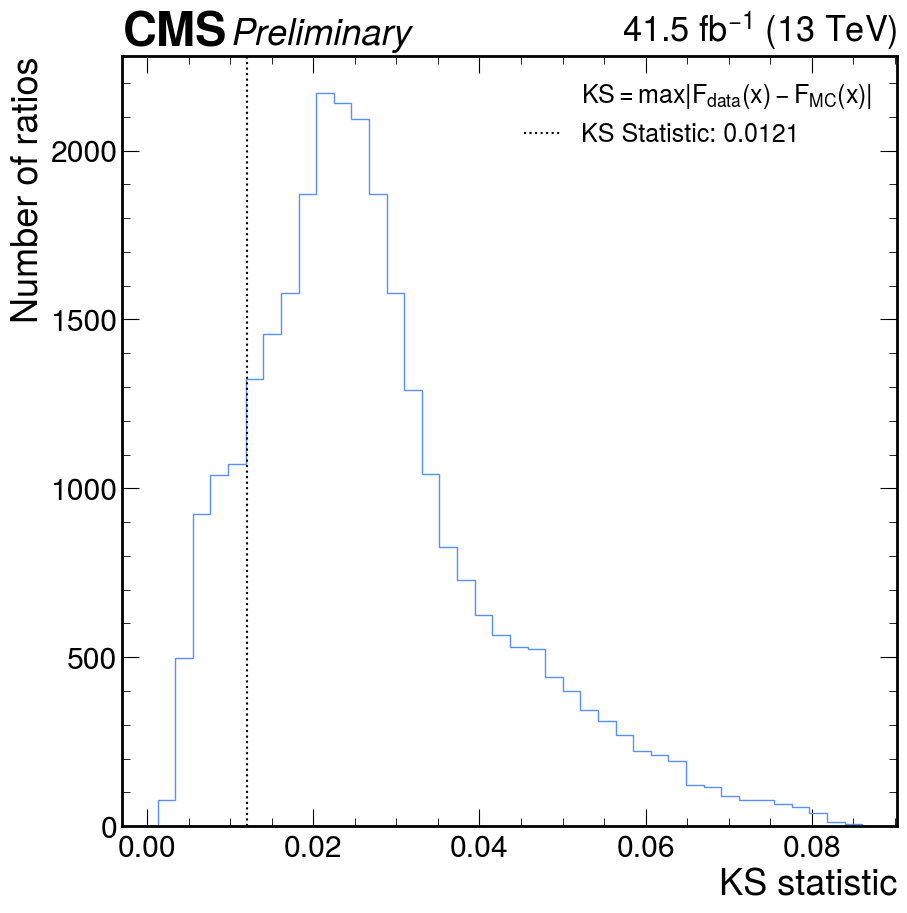

In [20]:
from matplotlib.lines import Line2D
plt.hist(ratios_df['ks_statistic'].to_numpy(), bins=40, histtype='step')
plt.ylabel('Number of ratios')
plt.xlabel('KS statistic')
hep.cms.label('Preliminary', lumi='41.5', data=True)
# plt.text(0.04, 2000, r"$KS = \max |F_{\mathrm{data}}(x) - F_{\mathrm{MC}}(x)|$",
#          fontsize=20)
plt.axvline(x=0.0120, color='k', linestyle=':', label='KS value = 0.01214')
custom_lines = [
    Line2D([0], [0], linestyle=''),
    Line2D([0], [0], color='k', linestyle=':'),
]
plt.legend(custom_lines,[r"$KS = \max |F_{\mathrm{data}}(x) - F_{\mathrm{MC}}(x)|$", 'KS Statistic: 0.0121'], fontsize=18)
plt.show()

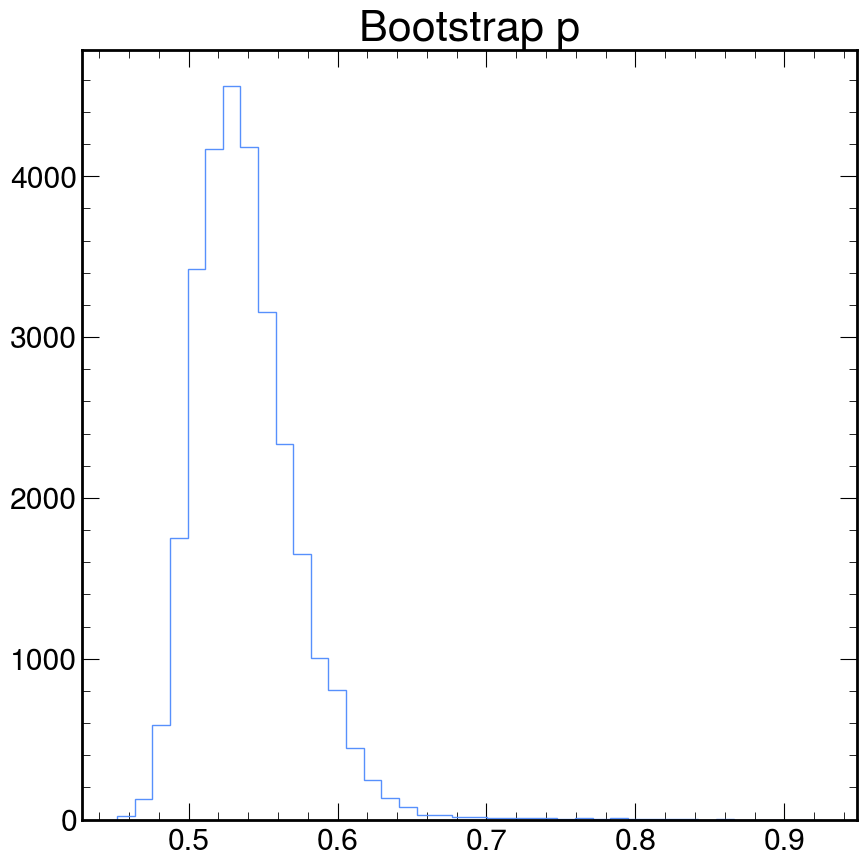

In [12]:
plt.hist(ratios_df['bootstrap_p'].to_numpy(), bins=40, histtype='step')
plt.title('Bootstrap p')
plt.show()

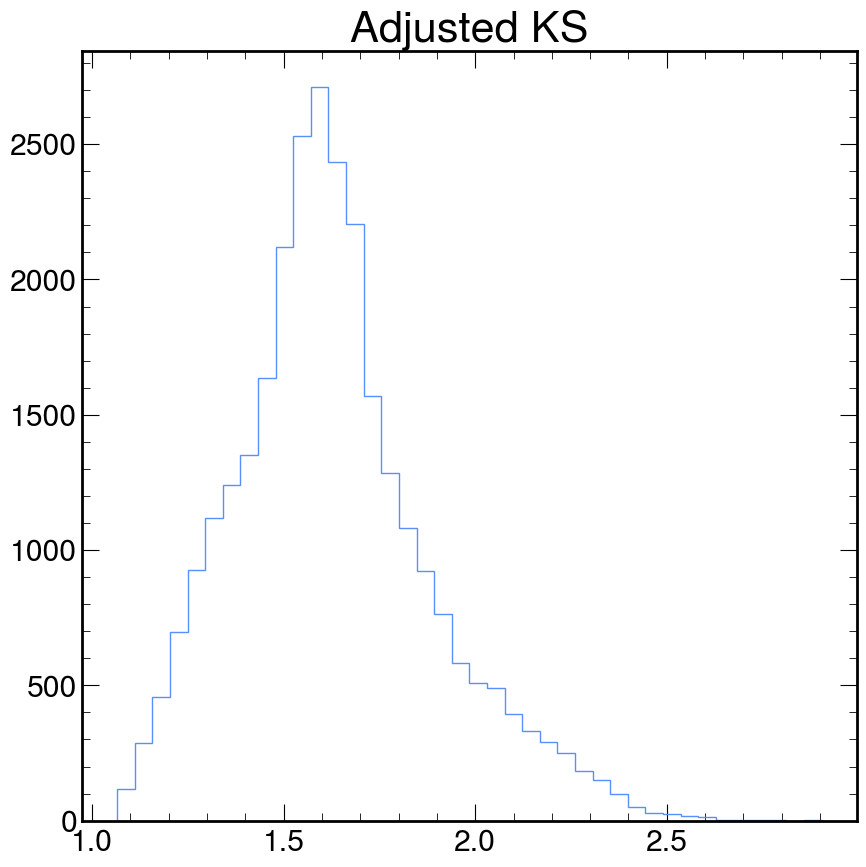

In [13]:
plt.hist(ratios_df['adjusted_ks'].to_numpy(), bins=40, histtype='step')
plt.title('Adjusted KS')
plt.show()

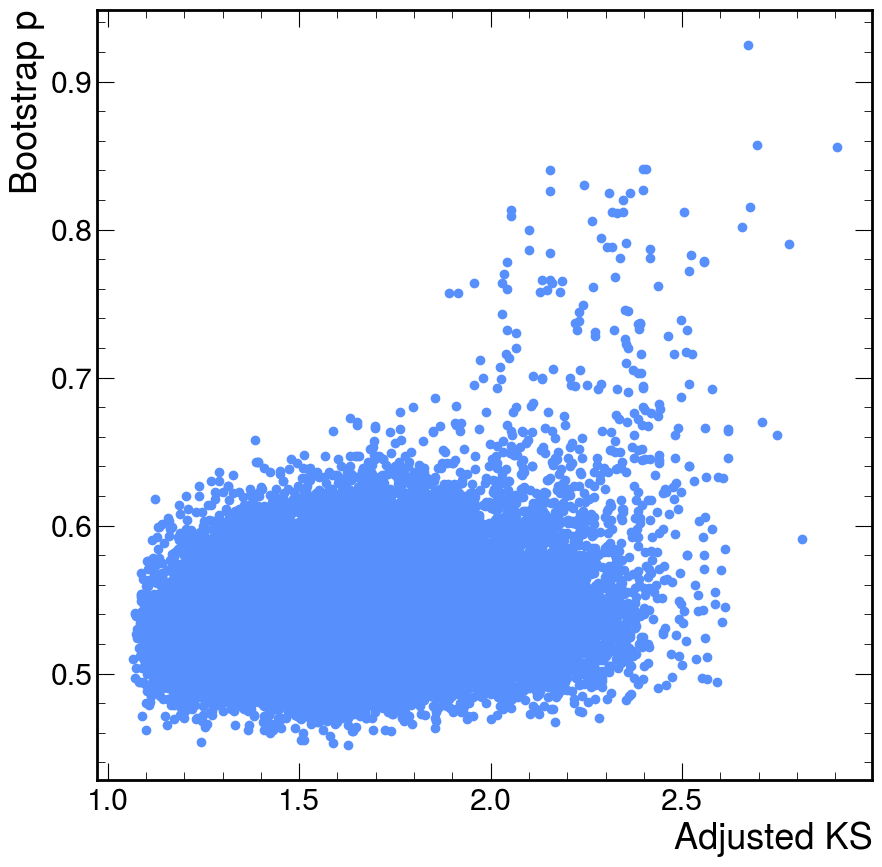

In [14]:
plt.scatter(x=ratios_df['adjusted_ks'].to_numpy(), y=ratios_df['bootstrap_p'].to_numpy())
plt.xlabel('Adjusted KS')
plt.ylabel('Bootstrap p')
plt.show()

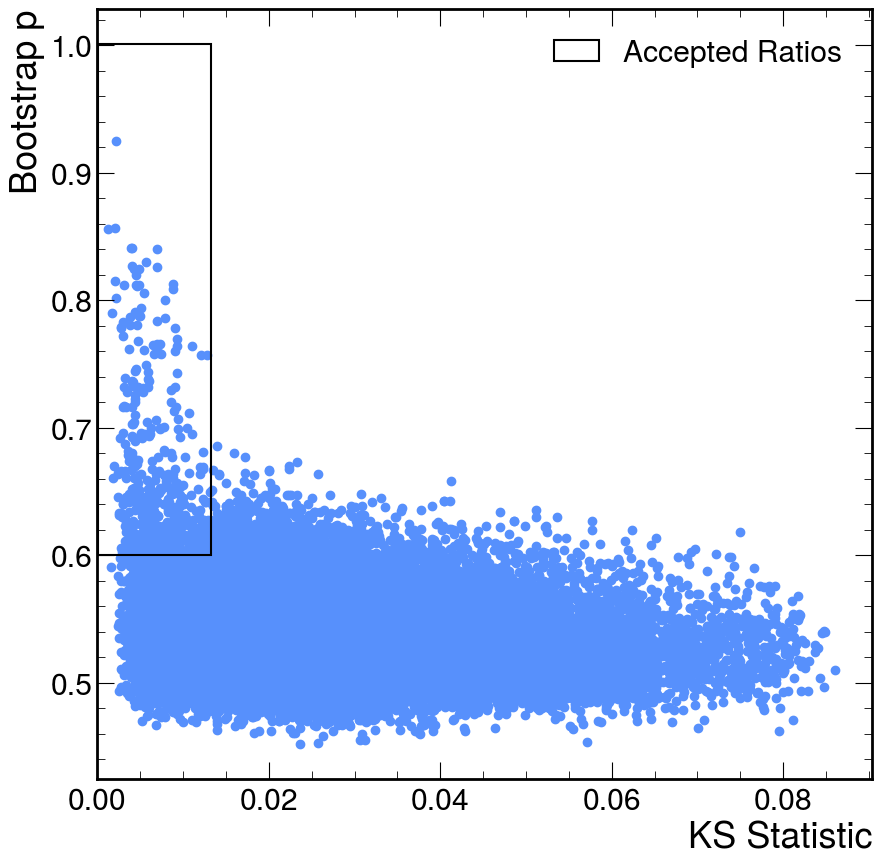

In [15]:
plt.scatter(x=ratios_df['ks_statistic'].to_numpy(), y=ratios_df['bootstrap_p'].to_numpy())
plt.xlabel('KS Statistic')
plt.ylabel('Bootstrap p')
x_min = 0.0001   # left edge
y_min = 0.6       # bottom edge
width = 0.0132   # box width (e.g., 0.01132 - 0.005)
height = 0.401
rect = Rectangle((x_min, y_min), width, height, linewidth=1.5, edgecolor='black', facecolor='none', label='Accepted Ratios')
plt.gca().add_patch(rect)# box height (e.g., 0.6 - 0.4)
plt.xlim(0,)
plt.legend()
plt.show()

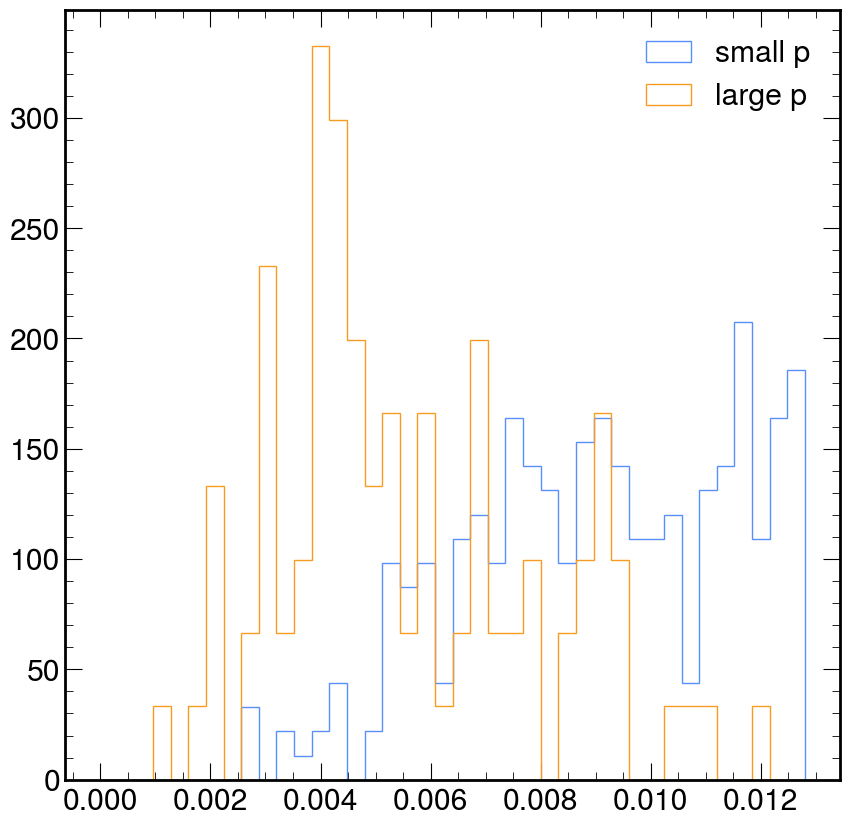

In [16]:
plt.hist(ratios_df[(ratios_df['ks_statistic'] <= 0.0128) & (ratios_df['bootstrap_p'] <= 0.5)]['ks_statistic'].to_numpy(), histtype='step', density=True, label='small p', bins=40, range=(0,0.0128))
plt.hist(ratios_df[(ratios_df['ks_statistic'] <= 0.0128) & (ratios_df['bootstrap_p'] >= 0.7)]['ks_statistic'].to_numpy(), histtype='step', density=True, label='large p', bins=40, range=(0,0.0128))
plt.legend()
plt.show()

In [50]:
ratios_df[(ratios_df['ks_statistic'] <= 0.016902) & (ratios_df['bootstrap_p'] >= 0.575)].sort_values(by='ks_statistic')

,ks_statistic,bootstrap_p,adjusted_ks
grm_4e415/1e225**2.4,0.001246,0.856,2.904432
grm_4e515/1e220**3.0,0.001541,0.591,2.812059
grm_3e520/1e220**3.0,0.001660,0.790,2.779994
ugm_1e430/1e210**3.0,0.001784,0.661,2.748692
grm_6e510/1e220**3.0,0.001954,0.670,2.709029
...,...,...,...
ugm_3e515/5e415**0.6,0.016856,0.615,1.773239
ugm_7e515/3e325**1.4,0.016865,0.614,1.773019
grm_1e515/8e515**0.125,0.016879,0.582,1.772644
ugm_1e505/2e505**0.5,0.016901,0.590,1.772077


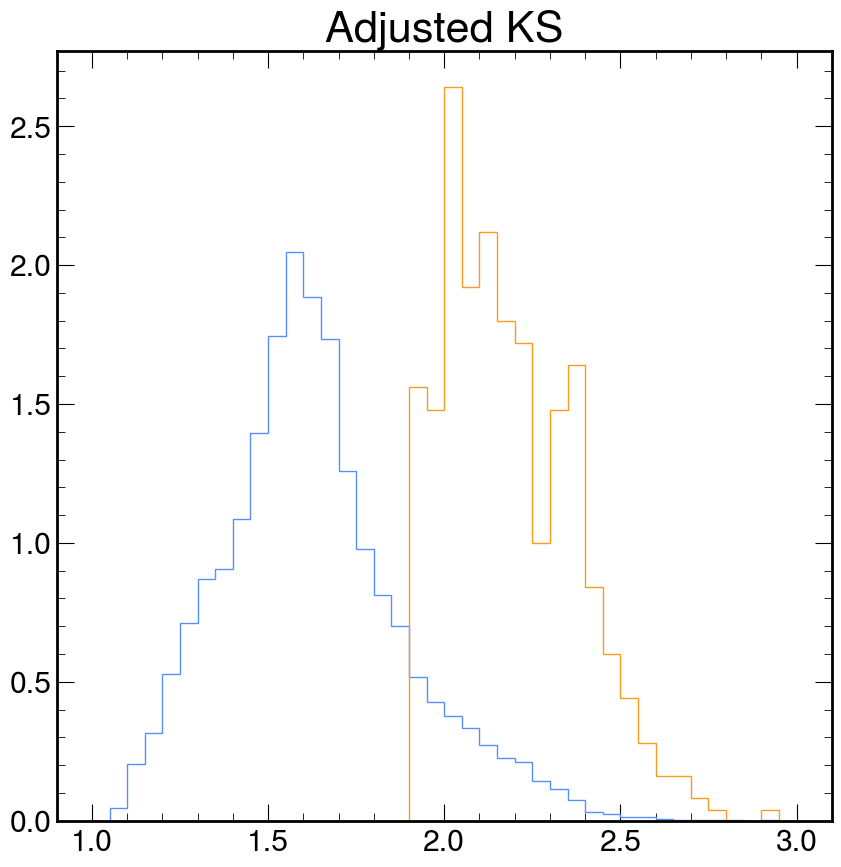

In [51]:
plt.hist(ratios_df['adjusted_ks'].to_numpy(), bins=40, histtype='step', label='All', density=True, range=(1,3))
plt.hist(ratios_df[(ratios_df['ks_statistic'] <= 0.01214) & (ratios_df['bootstrap_p'] >= 0.6)]['adjusted_ks'].to_numpy(), bins=40, histtype='step', label='Cut', density=True, range=(1,3))
plt.title('Adjusted KS')
plt.show()

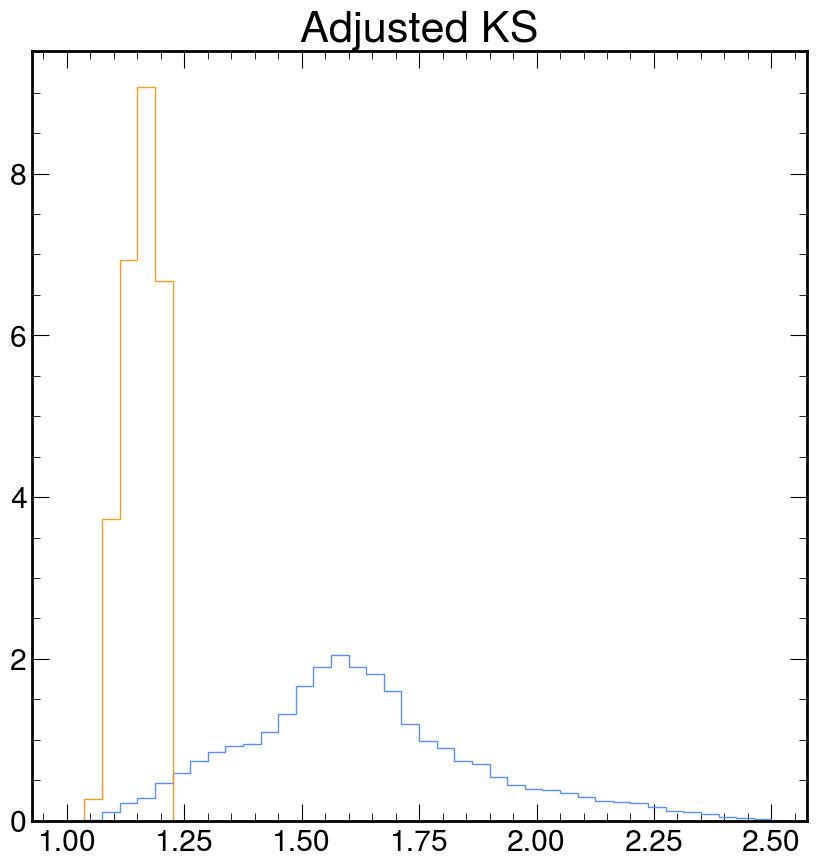

In [52]:
plt.hist(ratios_df['adjusted_ks'].to_numpy(), bins=40, histtype='step', label='All', density=True, range=(1,2.5))
plt.hist(ratios_df[(ratios_df['ks_statistic'] >= 0.06295) & (ratios_df['bootstrap_p'] <= 0.5)]['adjusted_ks'].to_numpy(), bins=40, histtype='step', label='Cut', density=True, range=(1,2.5))
plt.title('Adjusted KS')
plt.show()

In [53]:
train_ratios = list(ratios_df[(ratios_df['ks_statistic'] <= 0.01214) & (ratios_df['bootstrap_p'] >= 0.6)].index)
calib_ratios = list(ratios_df[(ratios_df['ks_statistic'] >= 0.06295) & (ratios_df['bootstrap_p'] <= 0.5)].index)
extreme_ratios = list(ratios_df[(ratios_df['ks_statistic'] <= 0.016902) & (ratios_df['bootstrap_p'] >= 0.575)].index)

In [21]:
def entry_check(entry):

    dash = entry.find('/')
    asterisk = entry.find('*')
    numerator = entry[4:dash]
    denominator = entry[dash+1:asterisk]
    exponent = entry[asterisk+2:].replace('_','.')

    if float(exponent) > 3:
        return 0, 0

    if numerator[1] == 'e':
        nume = int(numerator[2])

    elif numerator[2] == 'e':
        nume = int(numerator[3])

    if denominator[1] == 'e':
        deno = int(denominator[2])

    elif denominator[2] == 'e':
        deno = int(denominator[3])

    return nume, deno

In [22]:
counts = {
    "5,5": [0, 0.0],
    "5,4": [0, 0.0],
    "5,3": [0, 0.0],
    "5,2": [0, 0.0],
    "4,4": [0, 0.0],
    "4,3": [0, 0.0],
    "4,2": [0, 0.0],
    "3,3": [0, 0.0],
    "3,2": [0, 0.0],
    "2,2": [0, 0.0],
}

counts_grm = {
    "grm": [0, 0.0],
    "ugm": [0, 0.0],
}

total = len(train_ratios)

for i in train_ratios:
    ra = entry_check(i)
    key = f"{ra[0]},{ra[1]}"
    if key in counts:
        counts[key][0] += 1
    counts_grm[i[:3]][0] += 1

for key in counts:
    counts[key][1] = counts[key][0] / total if total > 0 else 0.0
for key in counts_grm:
    counts_grm[key][1] = counts_grm[key][0] / total if total > 0 else 0.0

In [23]:
counts_grm

{'grm': [304, 0.608], 'ugm': [196, 0.392]}

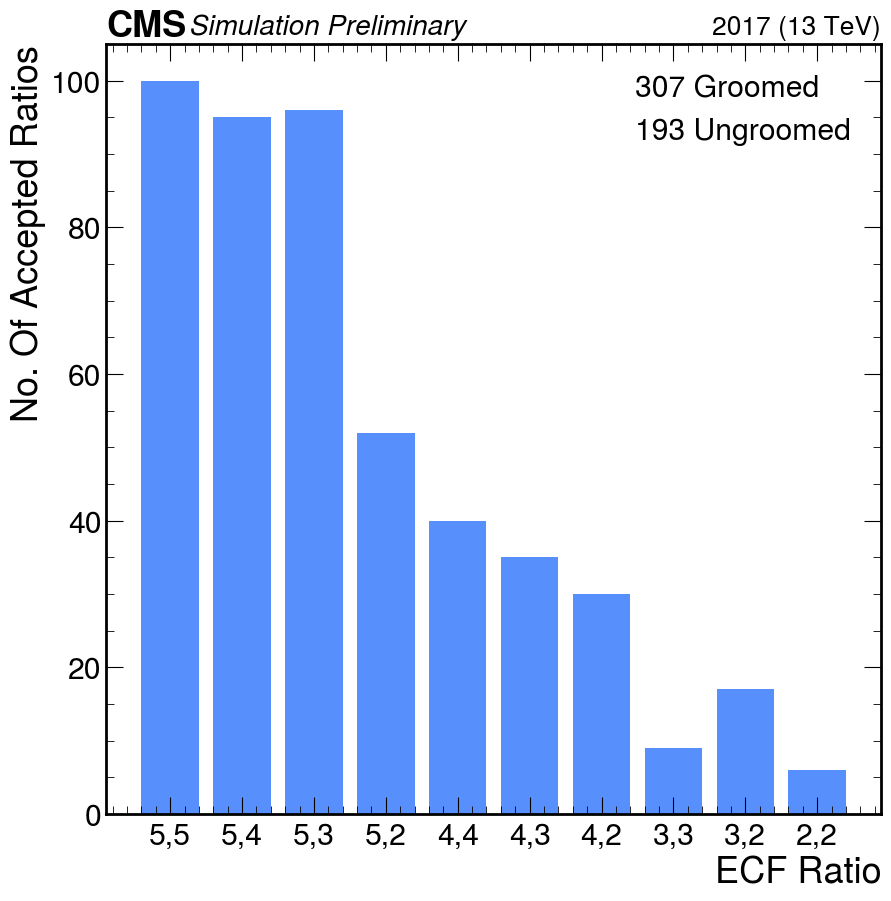

In [24]:
plt.bar(x=list(counts.keys()), height=np.array(list(counts.values()))[:,0])
plt.plot([], [], ' ', label='307 Groomed')
plt.plot([], [], ' ', label='193 Ungroomed')
# plt.title('Distribution of 500 ECFs')
plt.xlabel('Ratio Order')
plt.legend()
hep.cms.label('Preliminary', year='2017', fontsize=20)
plt.xlabel('ECF Ratio')
plt.ylabel('No. Of Accepted Ratios')
plt.show()

In [25]:
counts = {
    "5,5": [0, 0.0],
    "5,4": [0, 0.0],
    "5,3": [0, 0.0],
    "5,2": [0, 0.0],
    "4,4": [0, 0.0],
    "4,3": [0, 0.0],
    "4,2": [0, 0.0],
    "3,3": [0, 0.0],
    "3,2": [0, 0.0],
    "2,2": [0, 0.0],
}

counts_grm = {
    "grm": [0, 0.0],
    "ugm": [0, 0.0],
}

total = len(calib_ratios)

for i in calib_ratios:
    ra = entry_check(i)
    key = f"{ra[0]},{ra[1]}"
    if key in counts:
        counts[key][0] += 1
    counts_grm[i[:3]][0] += 1

for key in counts:
    counts[key][1] = counts[key][0] / total if total > 0 else 0.0
for key in counts_grm:
    counts_grm[key][1] = counts_grm[key][0] / total if total > 0 else 0.0

In [26]:
counts_grm

{'grm': [5, 0.05], 'ugm': [95, 0.95]}

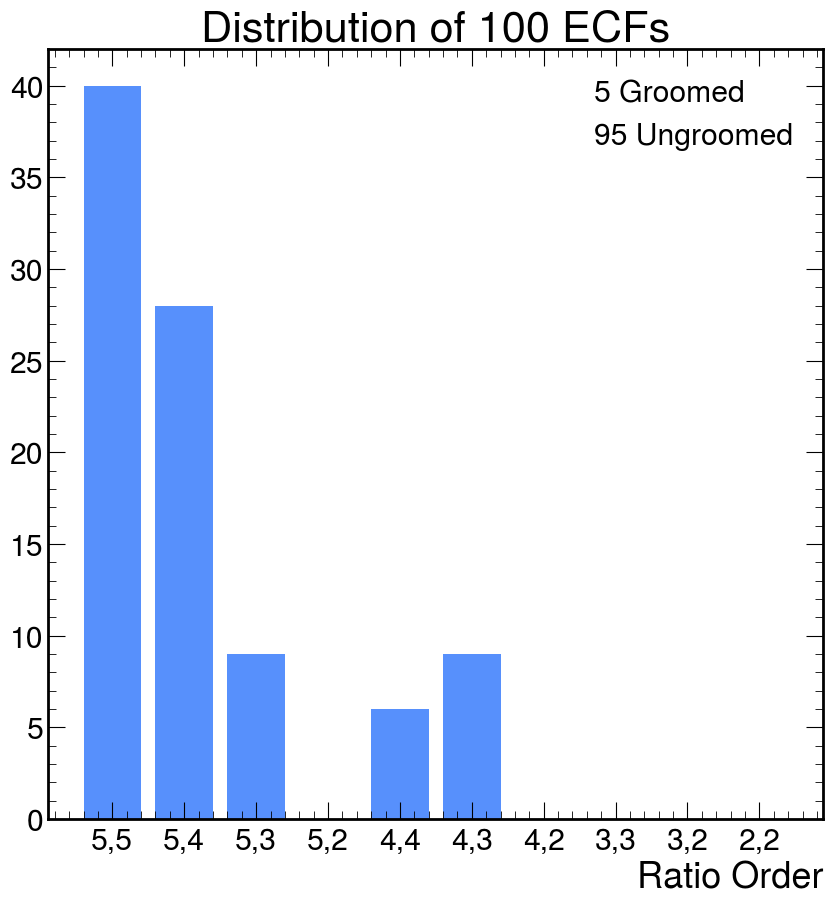

In [27]:
plt.bar(x=list(counts.keys()), height=np.array(list(counts.values()))[:,0])
plt.plot([], [], ' ', label='5 Groomed')
plt.plot([], [], ' ', label='95 Ungroomed')
plt.title('Distribution of 100 ECFs')
plt.xlabel('Ratio Order')
plt.legend()
plt.show()

In [28]:
# with open('train_ratios.json', 'w') as f:
#     json.dump(train_ratios, f)

In [55]:
with open('extreme_ratios.json', 'w') as f:
    json.dump(extreme_ratios, f)

In [29]:
# with open('calib_ratios.json', 'w') as f:
#     json.dump(calib_ratios, f)

In [30]:
import math 
-math.log10(0.01132)

1.9461535731477473

In [31]:
exps = []
for i in train_ratios:
    exps.append(float(i[i.find('**')+2:]))

(array([ 62., 112., 139.,  66.,  42.,  35.,  24.,   4.,  15.,   1.]),
 array([0.0125 , 0.46125, 0.91   , 1.35875, 1.8075 , 2.25625, 2.705  ,
        3.15375, 3.6025 , 4.05125, 4.5    ]),
 <BarContainer object of 10 artists>)

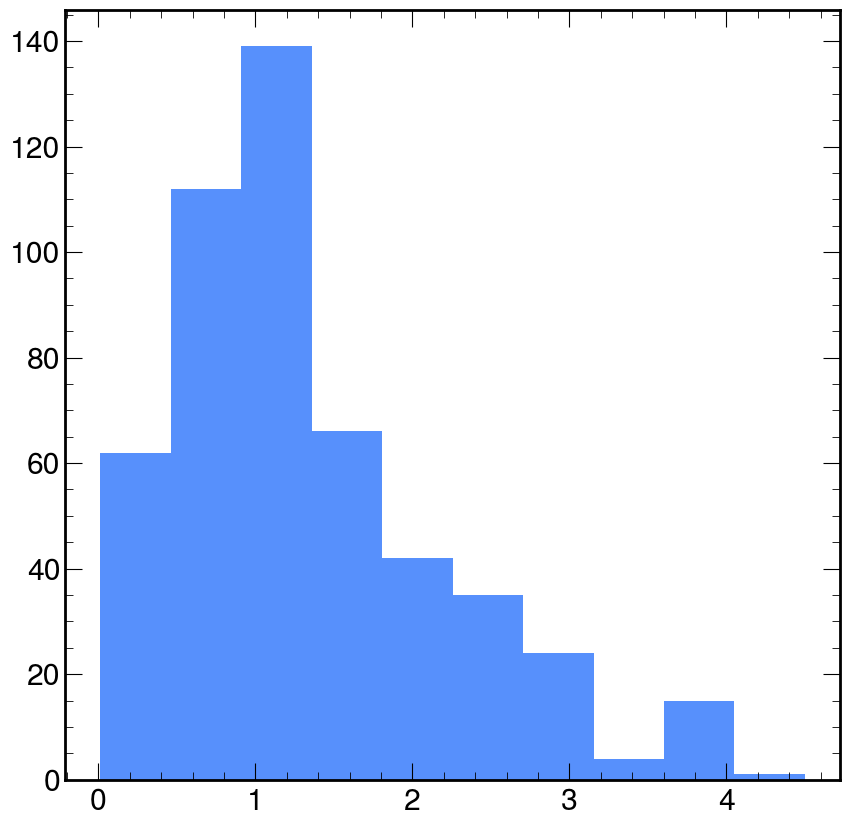

In [32]:
plt.hist(exps)